In [1]:
import numpy as np
import matplotlib.pyplot as plt

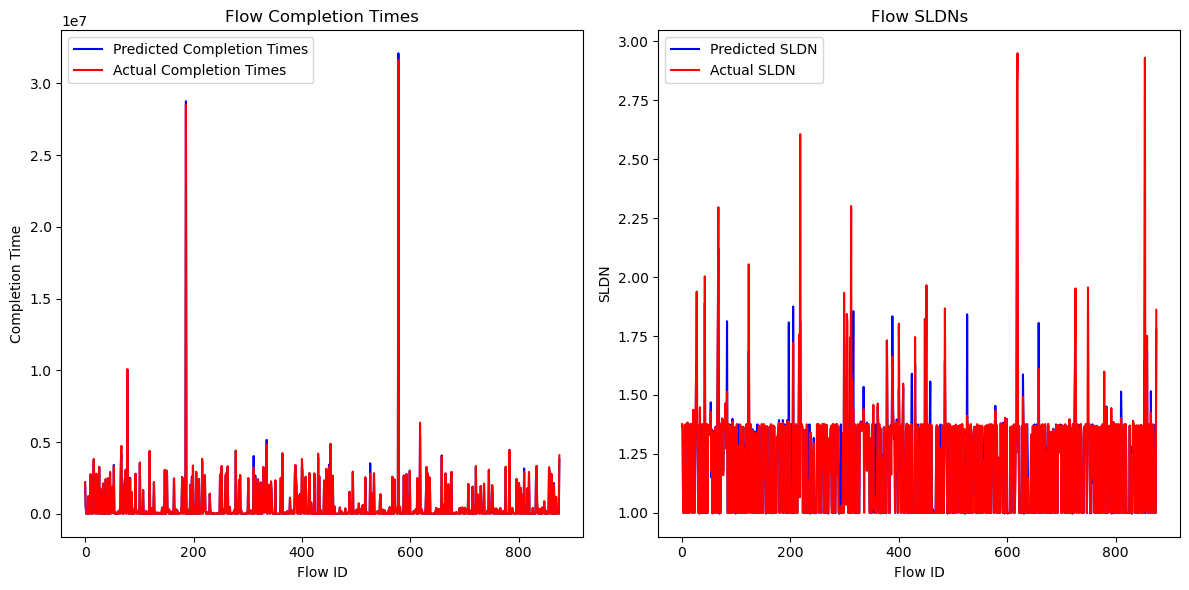

In [6]:
# Load the data from the .npz file
n_flows_total=1000
data = np.load(f'./res/inference_{n_flows_total}.npz')
completion_times = data['fct']
sldns = data['sldn']

# Extract the data
predicted_completion_times = completion_times[:, 0]
actual_completion_times = completion_times[:, 1]
predicted_sldns = sldns[:, 0]
actual_sldns = sldns[:, 1]

# Plotting the completion times
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(predicted_completion_times, label='Predicted Completion Times', color='b')
plt.plot(actual_completion_times, label='Actual Completion Times', color='r')
plt.xlabel('Flow ID')
plt.ylabel('Completion Time')
plt.title('Flow Completion Times')
plt.legend()

# Plotting the SLDNs
plt.subplot(1, 2, 2)
plt.plot(predicted_sldns, label='Predicted SLDN', color='b')
plt.plot(actual_sldns, label='Actual SLDN', color='r')
plt.xlabel('Flow ID')
plt.ylabel('SLDN')
plt.title('Flow SLDNs')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()
